# Question requirement

Imbalanced Classification Project
Project Deliverables
You will be required to submit:
● A GitHub repository with your project written in Python or R.
Instructions
Problem Statement
Beta Bank customers are leaving: little by little, chipping away every month. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on
clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1
score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.
1. Download and prepare the data. Explain the procedure.
2. Examine the balance of classes. Train the model without taking into account the
imbalance. Briefly describe your findings.
3. Improve the quality of the model. Make sure you use at least two approaches to
fixing class imbalance. Use the training set to pick the best parameters. Train
different models on training and validation sets. Find the best one. Briefly
describe your findings.
4. Perform the final testing.
Data description
● Dataset URL (CSV File): https://bit.ly/2XZK7Bo
Data description
● Features
○ RowNumber — data string index
○ CustomerId — unique customer identifier
○ Surname — surname
○ CreditScore — credit score
○ Geography — country of residence
○ Gender — gender
○ Age — age
○ Tenure — period of maturation for a customer’s fixed deposit (years)
○ Balance — account balance
○ NumOfProducts — number of banking products used by the customer
○ HasCrCard — customer has a credit card
○ IsActiveMember — customer’s activeness
○ EstimatedSalary — estimated salary
● Target
○ Exited — сustomer has left
Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before
moving on to the task.
● How did you prepare the data for training? Have you processed all of the feature
types?
● Have you explained the preprocessing steps well enough?
● How did you investigate the balance of classes?
● Did you study the model without taking into account the imbalance of classes?
● What are your findings of the task research?
● Have you correctly split the data into sets?
● How have you worked with the imbalance of classes?
● Did you use at least two techniques for imbalance fixing?
● Have you performed the model training, validation, and final testing correctly?
● How high is your F1 score?
● Did you examine the AUC-ROC values?
● Have you kept to the project structure and kept the code neat?
You can use the CRISP-DM methodology that we’ve used in the past, whose approach
will help you address the above questions.

In [ ]:
## Defining the Question
# to test balance of data , 
# to use models before balancing and after balancing to see the best model results. 

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve



In [ ]:
#read data
beta = pd.read_csv('https://bit.ly/2XZK7Bo')

In [ ]:
beta.shape

(10000, 14)

In [ ]:
# Explore the data
beta.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
# Explore the data
beta.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [ ]:
#checking for missing data
beta.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
# renaming column names

beta = beta.rename({'NumOfProducts': 'No of Products', 'HasCrCard': 'Has credit card', 'IsActiveMember': 'is an active member'}, axis=1)



In [ ]:
beta.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,No of Products,Has credit card,is an active member,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


In [ ]:
#replace blank values with 0

beta['Tenure'].fillna(0, inplace = True)

#betas = beta.dropna()


In [ ]:
beta.shape

(10000, 14)

In [ ]:
beta['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

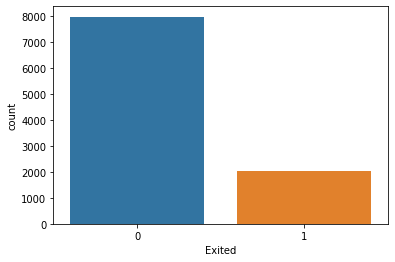

In [ ]:
# ploting the target to see the level of imbalance

# the data set is imbalanced

#we can either oversample or undersample the data to balance it.

sns.countplot(x ='Exited', data = beta)
 
# Show the plot
plt.show()

In [ ]:
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
beta.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
264,265,15700696,Kang,738,Spain,Male,31,0.0,79019.80,1,1,1,18606.23,0
4691,4692,15758050,Madukwe,622,Spain,Male,37,4.0,0.00,2,1,0,4459.50,0
1856,1857,15690925,McIntosh,527,Spain,Female,29,2.0,27755.97,1,1,0,97468.44,1
1559,1560,15671032,He,760,Germany,Male,42,0.0,77992.97,2,1,1,97906.38,0
4528,4529,15624995,McCane,714,Spain,Female,31,6.0,152926.60,1,1,1,50899.91,0


In [ ]:
#checking for duplicated data
beta.duplicated().sum()

0

In [ ]:
#convert numerical columns to float


betaX = beta.astype({'RowNumber':'float','CustomerId':'float','CreditScore':'float','Age':'float','Tenure':'float','Balance':'float',
                     'NumOfProducts':'float','HasCrCard':'float','IsActiveMember':'float','EstimatedSalary':'float','Exited':'float'})

betaX.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4001,4002.0,15792064.0,Pai,545.0,Germany,Male,53.0,5.0,114421.55,1.0,1.0,0.0,180598.28,1.0
6517,6518.0,15795246.0,Kaeppel,628.0,Germany,Female,51.0,9.0,155903.82,2.0,1.0,1.0,71159.84,0.0
3341,3342.0,15640866.0,Peng,718.0,France,Female,29.0,3.0,0.00,1.0,0.0,1.0,134462.29,0.0
1023,1024.0,15682639.0,Marshall,642.0,France,Male,32.0,3.0,0.00,2.0,1.0,1.0,88698.83,0.0
3189,3190.0,15596522.0,Meredith,692.0,France,Female,42.0,2.0,0.00,2.0,1.0,0.0,145222.93,0.0


In [ ]:
betaX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.1+ MB


In [ ]:
#define the training data & test data - 
# features is the input/training ; target is the output/testing

features = betaX.iloc[:,6:13]

target = betaX.iloc[:,13]


In [ ]:
features.sample(5)

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5085,49.0,8.0,121537.71,2.0,1.0,0.0,46521.45
2075,45.0,9.0,108231.37,1.0,1.0,1.0,188574.08
9636,40.0,5.0,139973.65,1.0,1.0,1.0,667.66
913,27.0,1.0,131899.00,1.0,1.0,0.0,93302.29
328,35.0,1.0,144848.74,1.0,1.0,1.0,179012.30


In [ ]:
target.sample(5)

3550    0.0
8318    0.0
5997    0.0
2672    0.0
9195    1.0
Name: Exited, dtype: float64

In [ ]:
##splitting data into training & testing.

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)



In [ ]:
# using model before balancing the data

# using decision tree, random forest & log regression

model_1= LogisticRegression(random_state=12345, solver='liblinear')
model_2 = DecisionTreeClassifier(random_state=12345)
model_3 = RandomForestClassifier(random_state=12345, n_estimators=9)

model_1.fit(features_train, target_train)
print('log regression Accuracy',model_1.score(features_valid,target_valid))

model_2.fit(features_train, target_train)
print('decision tree Accuracy',model_2.score(features_valid,target_valid))

model_3.fit(features_train, target_train)
print('Random Forest Accuracy',model_3.score(features_valid,target_valid))

print('F1 score:', model_2.score(features_valid, target_valid))



log regression Accuracy 0.786
decision tree Accuracy 0.7904
Random Forest Accuracy 0.8348
F1 score: 0.7904


In [ ]:
#upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample( features_train, target_train, 10)

upsampling_logreg_model = LogisticRegression(random_state=12345, solver='liblinear')
upsampling_logreg_model.fit(features_upsampled, target_upsampled)
upsampling_logreg_predicted_valid = upsampling_logreg_model.predict(features_valid)


print('F1:', f1_score(target_valid, upsampling_logreg_predicted_valid))
print('Accuracy', upsampling_logreg_model.score(features_valid, target_valid))
print('AUC', roc_auc_score(target_valid, upsampling_logreg_model.predict_proba(features_valid)[:,1]))

F1: 0.3525535420098847
Accuracy 0.214
AUC 0.68871798530356


In [ ]:
#downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

downsampling_logreg_model = LogisticRegression(random_state=12345, solver='liblinear')
downsampling_logreg_model.fit(features_downsampled, target_downsampled)
downsampling_logreg_predicted_valid = downsampling_logreg_model.predict(features_valid)


print('F1:', f1_score(target_valid, downsampling_logreg_predicted_valid))
print('Accuracy', downsampling_logreg_model.score(features_valid, target_valid))
print('AUC', roc_auc_score(target_valid, downsampling_logreg_model.predict_proba(features_valid)[:,1]))


F1: 0.3525535420098847
Accuracy 0.214
AUC 0.7251623029178854


In [ ]:
# findings

#before balancing the data f1 score is 0.7904, but using downsampling and upsampling, f1 score is  0.3525535420098847 and 0.3525535420098847 respectively.
# meaning we need to balance the data for better results

